In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
#Loading the Dataset 

In [27]:
file_path= 'wmt_data.csv'
df = pd.read_csv(file_path)

In [15]:
#Display the first 10 rows

In [28]:
print(df.head(10))

                        date       open       high        low      close  \
0  2000-01-03 00:00:00-05:00  22.791668  23.000000  21.833332  22.270832   
1  2000-01-04 00:00:00-05:00  21.833332  21.937500  21.395832  21.437500   
2  2000-01-05 00:00:00-05:00  21.291668  21.458332  20.729168  21.000000   
3  2000-01-06 00:00:00-05:00  21.000000  21.520832  20.895832  21.229168   
4  2000-01-07 00:00:00-05:00  21.500000  22.979168  21.500000  22.833332   
5  2000-01-10 00:00:00-05:00  22.416668  22.500000  21.875000  22.416668   
6  2000-01-11 00:00:00-05:00  22.354168  22.583332  21.875000  22.083332   
7  2000-01-12 00:00:00-05:00  22.062500  22.250000  21.687500  21.687500   
8  2000-01-13 00:00:00-05:00  22.000000  22.041668  21.666668  21.708332   
9  2000-01-14 00:00:00-05:00  21.333332  21.979168  21.333332  21.500000   

   adj_close    volume  
0  14.307388  25109700  
1  13.772032  20235300  
2  13.490974  21056100  
3  13.638196  19633500  
4  14.668746  23930700  
5  14.401082 

In [72]:
#Convert the date column to the date type

In [71]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


/var/folders/47/52n8nvf136x7f4rtd97135vh0000gn/T/ipykernel_7576/1705850665.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [8]:
#Check the Basic Info 

In [73]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          6345 non-null   object 
 1   open          6345 non-null   float64
 2   high          6345 non-null   float64
 3   low           6345 non-null   float64
 4   close         6345 non-null   float64
 5   adj_close     6345 non-null   float64
 6   volume        6345 non-null   int64  
 7   daily_range   6345 non-null   float64
 8   daily_return  6344 non-null   float64
 9   rolling_std   6316 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 495.8+ KB
None


In [10]:
#Get summary Statistics

In [74]:
print(df.describe())

              open         high          low        close    adj_close  \
count  6345.000000  6345.000000  6345.000000  6345.000000  6345.000000   
mean     27.795108    28.035953    27.562206    27.802202    23.525582   
std      15.407437    15.520020    15.298979    15.416064    16.874871   
min      14.000000    14.226667    13.812500    14.090000     9.293771   
25%      17.556667    17.736668    17.386667    17.559999    11.818660   
50%      21.145832    21.326668    20.906668    21.183332    16.898726   
75%      32.703335    32.950001    32.413334    32.703335    29.430143   
max     105.300003   105.300003   103.599998   105.050003   104.762314   

             volume  daily_range  daily_return  rolling_std  
count  6.345000e+03  6345.000000   6344.000000  6316.000000  
mean   3.094107e+07     0.473746      0.000389     0.593431  
std    1.965558e+07     0.376882      0.014741     0.648631  
min    6.094200e+06     0.053332     -0.113758     0.090111  
25%    1.864440e+07    

In [12]:
#Check the missing values (NaN)

In [75]:
print(df.isnull().sum())

date             0
open             0
high             0
low              0
close            0
adj_close        0
volume           0
daily_range      0
daily_return     1
rolling_std     29
dtype: int64


In [19]:
#Plot adjusted close over time 

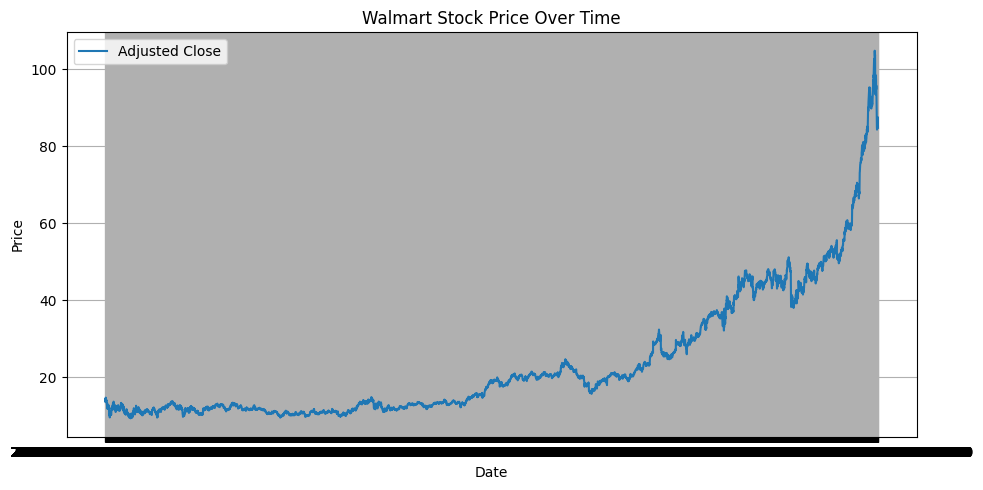

In [32]:
plt.figure(figsize=(10,5))
plt.plot(df['date'],df['adj_close'],label = 'Adjusted Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Walmart Stock Price Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [34]:
#Daily Price Range (High - Low)

In [35]:
df['daily_range'] = df['high'] - df['low']
df[['date','daily_range']].head()

,date,daily_range
0,2000-01-03 00:00:00-05:00,1.166668
1,2000-01-04 00:00:00-05:00,0.541668
2,2000-01-05 00:00:00-05:00,0.729164
3,2000-01-06 00:00:00-05:00,0.625000
4,2000-01-07 00:00:00-05:00,1.479168


In [40]:
# Daily Returns and Volatility

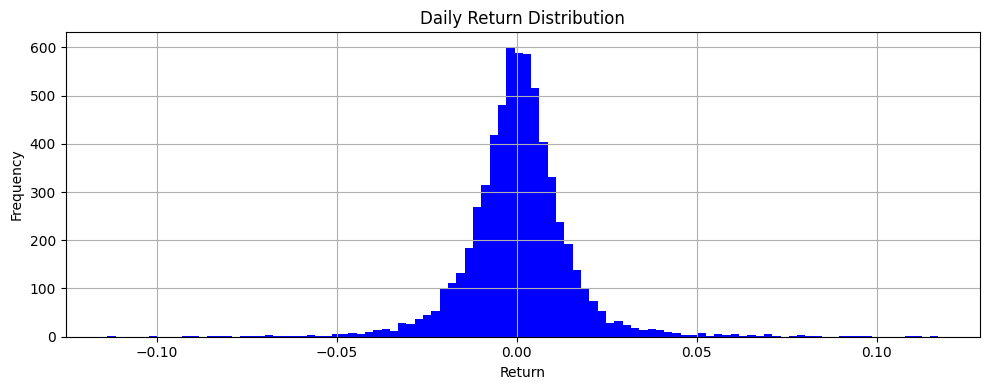

In [42]:
df['daily_return'] = df['adj_close'].pct_change()

plt.figure(figsize=(10,4))
plt.hist(df['daily_return'].dropna(), bins=100, color='blue')
plt.title('Daily Return Distribution')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:
#Top Gainers & Losers

In [43]:
top_gainers = df.sort_values('daily_return', ascending=False).head()
top_losers = df.sort_values('daily_return').head()
print("Top Gainers:\n", top_gainers[['date', 'daily_return']])
print("\nTop Losers:\n", top_losers[['date', 'daily_return']])


Top Gainers:
                            date  daily_return
5082  2020-03-17 00:00:00-04:00      0.117085
2218  2008-10-28 00:00:00-04:00      0.110730
4498  2017-11-16 00:00:00-05:00      0.108984
5080  2020-03-13 00:00:00-04:00      0.096588
4120  2016-05-19 00:00:00-04:00      0.095803

Top Losers:
                            date  daily_return
5629  2022-05-17 00:00:00-04:00     -0.113758
4561  2018-02-20 00:00:00-05:00     -0.101832
3970  2015-10-14 00:00:00-04:00     -0.100405
5079  2020-03-12 00:00:00-04:00     -0.090711
31    2000-02-16 00:00:00-05:00     -0.090517


In [46]:
#Correlation between features

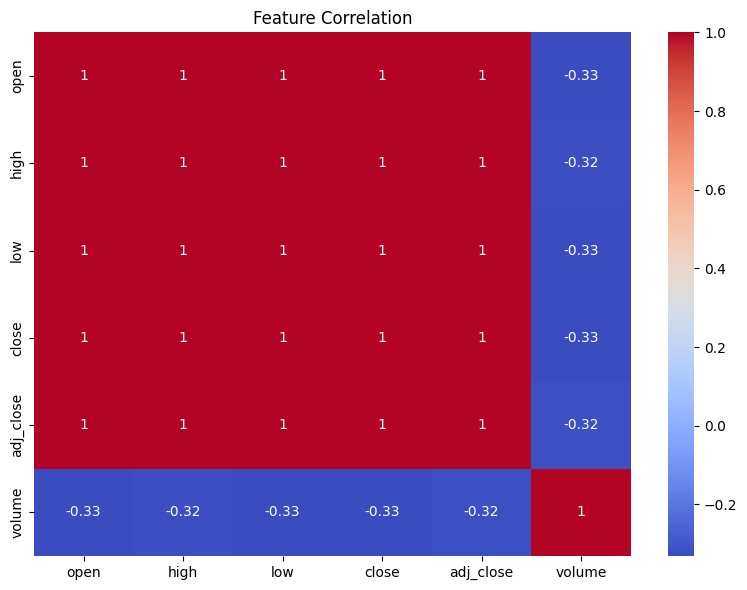

In [47]:

plt.figure(figsize=(8,6))
sns.heatmap(df[['open', 'high', 'low', 'close', 'adj_close', 'volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.tight_layout()
plt.show()


In [48]:
#Rolling Standard Deviation (Volatility Over Time)

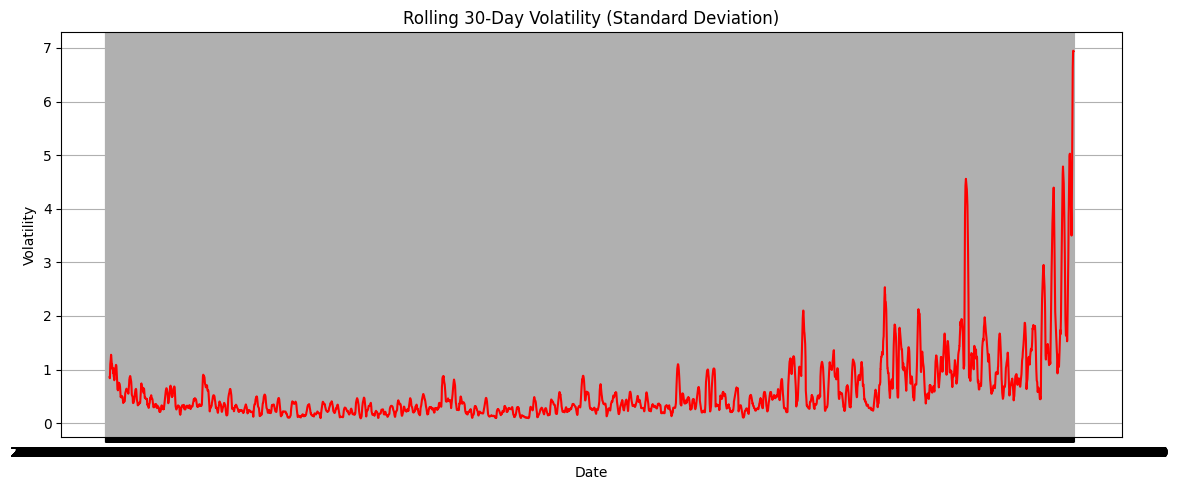

In [49]:
df['rolling_std'] = df['adj_close'].rolling(window=30).std()

plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['rolling_std'], color='red')
plt.title('Rolling 30-Day Volatility (Standard Deviation)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#

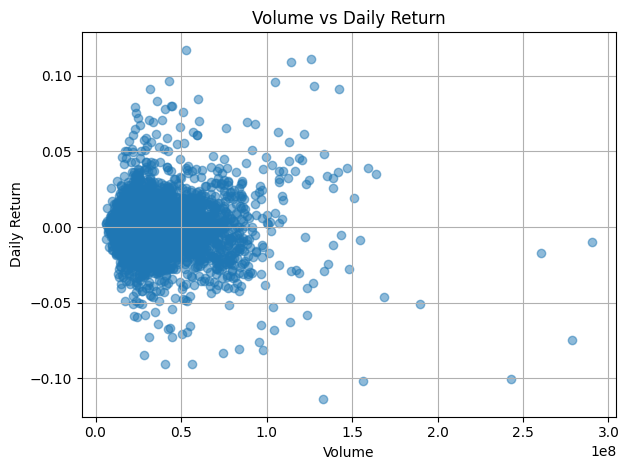

In [54]:
plt.scatter(df['volume'], df['daily_return'], alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Daily Return')
plt.title('Volume vs Daily Return')
plt.grid(True)
plt.tight_layout()
plt.show()


In [60]:
#Daily Price Range(High-low)

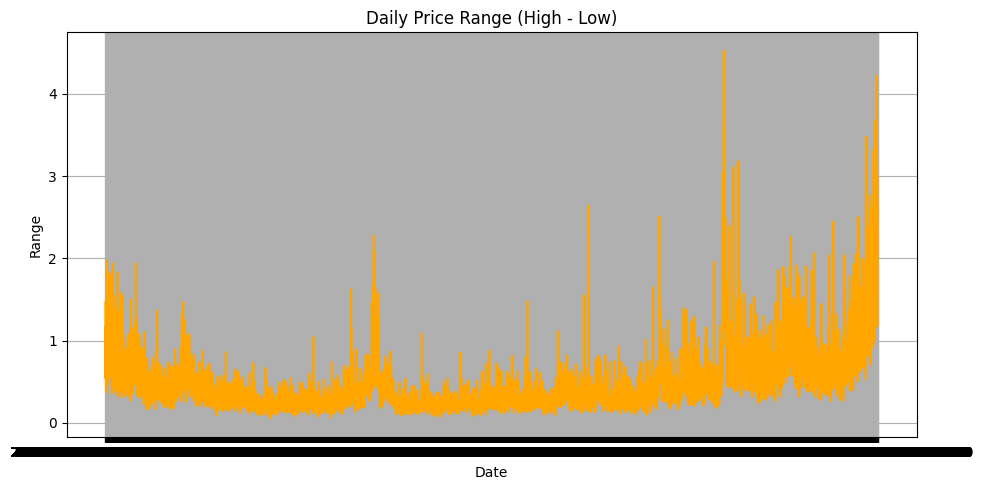

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['daily_range'], color='orange')
plt.title("Daily Price Range (High - Low)")
plt.xlabel("Date")
plt.ylabel("Range")
plt.grid(True)
plt.tight_layout()
plt.show()


In [64]:
#Top 5 Gaining Days

In [63]:
top_gainers = df.sort_values(by='daily_return', ascending=False).head()
print("Top 5 Gainers:")
print(top_gainers[['date', 'adj_close', 'daily_return']])


Top 5 Gainers:
                           date  adj_close  daily_return
5082  2020-03-17 00:00:00-04:00  36.780537      0.117085
2218  2008-10-28 00:00:00-04:00  12.936396      0.110730
4498  2017-11-16 00:00:00-05:00  29.261173      0.108984
5080  2020-03-13 00:00:00-04:00  35.189156      0.096588
4120  2016-05-19 00:00:00-04:00  19.642174      0.095803


In [65]:
#Top 5 Losing Days 

In [66]:
top_losers = df.sort_values(by='daily_return').head()
print("Top 5 Losers:")
print(top_losers[['date', 'adj_close', 'daily_return']])


Top 5 Losers:
                           date  adj_close  daily_return
5629  2022-05-17 00:00:00-04:00  42.154850     -0.113758
4561  2018-02-20 00:00:00-05:00  27.788410     -0.101832
3970  2015-10-14 00:00:00-04:00  16.651674     -0.100405
5079  2020-03-12 00:00:00-04:00  32.089676     -0.090711
31    2000-02-16 00:00:00-05:00  11.296013     -0.090517
